In [85]:
import scipy.io as scio
import numpy as np
dataFile = 'Heart_CVID.mat'
data = scio.loadmat(dataFile)
data
np.shape(data['X'])
np.shape(data['CV_ID'])
#划分数据集和标签
arrMat=np.mat(data['X'])
labelMat=np.mat(data['Y'])

In [86]:
print("array:{},label:{}".format(np.shape(arrMat),np.shape(labelMat)))

array:(270, 13),label:(270, 1)


In [87]:
#划分测试集和训练集
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test=train_test_split(arrMat,labelMat,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((216, 13), (54, 13))

In [89]:
#引入包
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [90]:
#建立模型
sc=StandardScaler()
sc.fit(arrMat)
standard_train=sc.transform(x_train)
standard_test=sc.transform(x_test)

In [91]:
#模型训练
dtc=DecisionTreeClassifier() #所有参数均为默认值
dtc.fit(standard_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [92]:
#模型测试
result=dtc.predict(standard_test)
#print("测试集合的y值：",list(y_test))
#print("决策树算法预测的的y值：",list(result))
print("预测的正确率为：",dtc.score(standard_test,y_test))
dtc.score(standard_train,y_train)

预测的正确率为： 0.8148148148148148


1.0

In [93]:
#讨论超参数Max-depth的影响,并找出最佳参数值
def m_score(depth):#depth上面建树默认none，此处传参数
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score,test_score

In [94]:
depths = range(2,13)
scores = [m_score(depth) for depth in depths]

In [95]:
#s[0]是分数中的训练集得分，s[1]是测试集得分
train_s = [s[0] for s in scores]

In [96]:
test_s = [s[1] for s in scores]

In [97]:
#可视化
import matplotlib.pyplot as plt

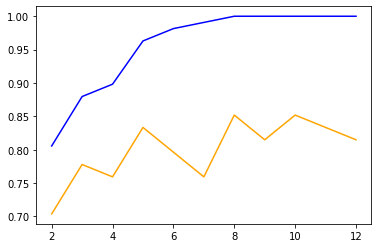

In [98]:
plt.plot(depths, train_s, color='blue')
plt.plot(depths, test_s, color='orange')
plt.show()#横轴是最大深度，纵轴是分数，从图可得在第5层左右，测试集表现良好

In [99]:
#讨论超参数min_impurity_decrease 的影响,并找出最佳参数值
def m_score(value):#将默认参数0改掉，传参数
    model = DecisionTreeClassifier(min_impurity_decrease=value)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return train_score,test_score

In [100]:
#返回0~0.5之间等间隔的50个数
values = np.linspace(0,0.5,50)
#values

In [101]:
scores = [m_score(value) for value in values]

In [102]:
train_s = [s[0] for s in scores]
test_s = [s[1] for s in scores]

In [103]:
#np.argmax取出最大元素值对应索引
best_index = np.argmax(test_s)

In [104]:
dest_score = test_s[best_index]

In [105]:
dest_value = values[best_index]

In [106]:
dest_score,dest_value

(0.8148148148148148, 0.0)

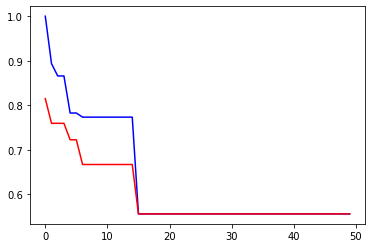

In [107]:
plt.plot(train_s, color='blue')
plt.plot(test_s, color='red')

In [108]:
#利用交叉验证进行超参数选择
from sklearn.model_selection import GridSearchCV

values = np.linspace(0, 0.5, 50)
#values

In [109]:
depths = range(2,13)

In [110]:
param_grid = {'max_depth': depths, 'min_impurity_decrease': values}

In [111]:
#网格搜索自动调参(分类器,参数,)
model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [112]:
model.fit(arrMat,labelMat)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.3

In [113]:
model.best_params_

{'max_depth': 3, 'min_impurity_decrease': 0.01020408163265306}

In [114]:
model.best_score_

0.8